In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [115]:
df = pd.read_csv(r"C:\Users\rachi\OneDrive\Desktop\datahack_gitrepo\datasets\kaggle_18_21\startup_funding2021.csv")

In [116]:
df.dropna(inplace=True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  741 non-null    object 
 1   Founded        741 non-null    float64
 2   HeadQuarter    741 non-null    object 
 3   Sector         741 non-null    object 
 4   What it does   741 non-null    object 
 5   Founders       741 non-null    object 
 6   Investor       741 non-null    object 
 7   Amount($)      741 non-null    object 
 8   Stage          741 non-null    object 
dtypes: float64(1), object(8)
memory usage: 57.9+ KB


In [118]:
np.sort(df["Founded"].unique())

array([1989., 1994., 1999., 2000., 2002., 2004., 2007., 2008., 2009.,
       2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.,
       2019., 2020., 2021.])

In [119]:
df.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [120]:
def convert_to_int(dataframe):
    # First, convert all values to string type
    dataframe['Founded'] = dataframe['Founded'].astype(str)

    # Remove any decimal points and extra whitespace
    dataframe['Founded'] = dataframe['Founded'].str.replace('.0', '').str.strip()

    # Convert the column to integer
    dataframe['Founded'] = pd.to_numeric(dataframe['Founded'], errors='coerce')

    return dataframe

df = convert_to_int(df)

In [121]:
def convert_amount_to_int(dataframe):
    # Define a function to extract numeric parts from the string
    def extract_numeric(value):
        try:
            # Remove any commas from the value and extract numeric part
            numeric_part = re.sub('[^0-9.]', '', value)
            return int(float(numeric_part))
        except (ValueError, TypeError):
            # Handle non-numeric values, e.g., "Undisclosed"
            return None

    # Apply the extract_numeric function to the "amount" column
    dataframe['Amount($)'] = dataframe['Amount($)'].apply(extract_numeric)

    return dataframe
df = convert_amount_to_int(df)

In [122]:
df.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [123]:
cd = ['HeadQuarter', 'Sector', 'Founders', 'Investor','Stage']
nd = ['Founded', 'Amount($)']

<Figure size 640x480 with 0 Axes>

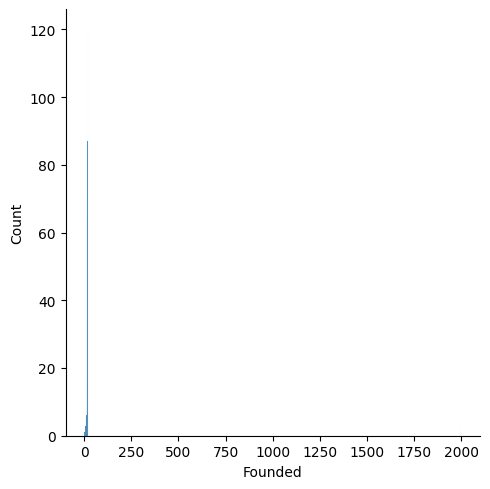

<Figure size 640x480 with 0 Axes>

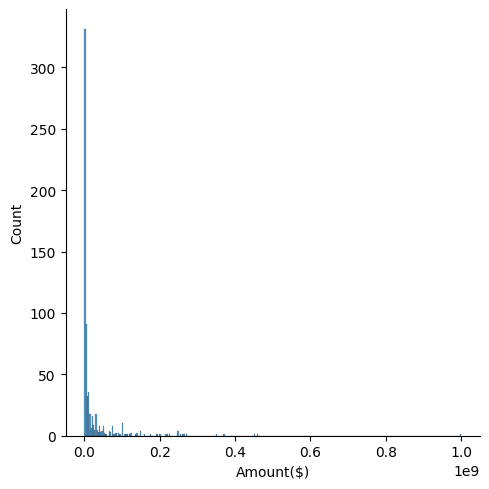

In [124]:
skewness = []
for i in nd:
    plt.figure()
    sns.displot(df[i])
    skewness.append(df[i].skew())